In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

random_state = 44

In [123]:
df = pd.read_csv("features.csv", index_col=0)
df.dropna(inplace=True)
X = df.drop(columns=['malign', 'patient_name'])
y = df['malign']

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
scaler.transform(X)

array([[0.66872238, 0.32067174, 0.33801178, ..., 0.        , 0.        ,
        0.        ],
       [0.81503525, 0.43431311, 0.47255324, ..., 0.        , 0.        ,
        0.        ],
       [0.89418626, 0.43642804, 0.52003056, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.63515194, 0.17930703, 0.19413937, ..., 0.        , 0.        ,
        0.        ],
       [0.23890031, 0.14268305, 0.14697542, ..., 0.        , 0.        ,
        0.        ],
       [0.21205056, 0.08051066, 0.07892094, ..., 0.        , 0.        ,
        0.        ]])

In [125]:
from sklearn.decomposition import PCA

pca = PCA(random_state=random_state, n_components=None)
pca.fit(X)

PCA(random_state=44)

In [126]:
results = {'Variance explained': []}
for i in range(1, 800):
    cumsum = np.sum(pca.explained_variance_ratio_[:i])
    results['Variance explained'].append(np.sum(pca.explained_variance_ratio_[:i]))
    if cumsum == 1:
        break

results_df = pd.DataFrame(results)
print(len(results['Variance explained']))
results_df.head(800)

146


,Variance explained
0,0.943401
1,0.999272
2,0.999941
3,0.999993
4,0.999996
...,...
141,1.000000
142,1.000000
143,1.000000
144,1.000000


In [127]:
pca = PCA(random_state=random_state, n_components=len(results['Variance explained']))
pca.fit(X)
X_PCA = pca.transform(X)
X = X_PCA

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=random_state)

In [129]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=random_state, max_iter=10**4, solver='liblinear', tol=1e-10)

clfs = [clf]
clfs_names = ["LogisticRegression"]

clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=44, solver='liblinear',
                   tol=1e-10)

In [130]:
print(clf.coef_)

[[ 6.59624976e-10 -3.23179046e-09 -8.08416950e-09 -9.45911721e-08
   4.82345599e-07 -3.38100325e-07  4.99871351e-07 -5.57809266e-07
   4.17669512e-06  1.00996189e-06  4.63014070e-06 -5.94860595e-07
  -6.75653973e-06 -7.56342226e-07 -2.34387982e-06  5.67683960e-06
  -8.57602572e-06  1.45377580e-04  4.56193633e-05  1.05935942e-04
  -8.48054926e-05 -3.72075336e-04 -2.65954402e-04  5.47778343e-04
   1.68572545e-04  1.67010636e-04 -5.77589787e-04  9.03598965e-04
  -1.06978023e-03  6.90817996e-04  1.26738745e-04 -8.32216784e-04
  -3.40860267e-04 -1.40021036e-03 -1.44682085e-03  3.70520139e-04
  -1.61203556e-03 -7.51901400e-04  2.33389649e-03 -2.09953847e-03
   1.35113905e-03 -1.32052294e-03  2.47382009e-03 -5.05538936e-04
   3.11409489e-03 -1.20485913e-03  2.42372588e-03 -3.24276697e-04
   1.05242140e-03  1.93587141e-03 -4.65472829e-04  1.03704685e-02
   4.36583506e-04  3.33522530e-03  7.50570561e-03  4.86196271e-03
   3.40770625e-03 -1.99645724e-03  7.82827913e-03  9.73102232e-03
   1.89424

In [131]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_train)

results = {'Name': [], 'Accuracy': [], 'F1 score': [], 'Precision': [], 'Recall': []}
ys_pred = {}

for clf, name in zip(clfs, clfs_names):
    y_pred = clf.predict(X_train)
    ys_pred[name] = y_pred
    results['Name'].append(name)
    results['Accuracy'].append(accuracy_score(y_train, y_pred))
    results['F1 score'].append(f1_score(y_train, y_pred))
    results['Precision'].append(precision_score(y_train, y_pred))
    results['Recall'].append(recall_score(y_train, y_pred))

results_df = pd.DataFrame(results)
print("Performance on TRAINING set")
results_df.head(len(clfs_names))

Performance on TRAINING set


,Name,Accuracy,F1 score,Precision,Recall
0,LogisticRegression,0.777365,0.67655,0.570455,0.831126


In [132]:
y_pred = clf.predict(X_val)

results = {'Name': [], 'Accuracy': [], 'F1 score': [], 'Precision': [], 'Recall': []}
ys_pred = {}

for clf, name in zip(clfs, clfs_names):
    y_pred = clf.predict(X_val)
    ys_pred[name] = y_pred
    results['Name'].append(name)
    results['Accuracy'].append(accuracy_score(y_val, y_pred))
    results['F1 score'].append(f1_score(y_val, y_pred))
    results['Precision'].append(precision_score(y_val, y_pred))
    results['Recall'].append(recall_score(y_val, y_pred))

results_df = pd.DataFrame(results)
print("Performance on VALIDATION set")
results_df.head(len(clfs_names))

Performance on VALIDATION set


,Name,Accuracy,F1 score,Precision,Recall
0,LogisticRegression,0.777778,0.651163,0.56,0.777778


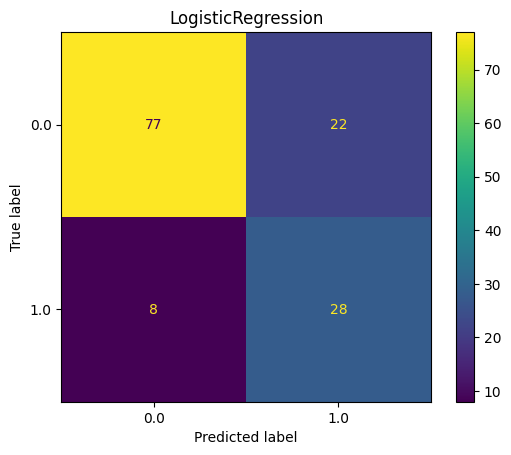

In [133]:
for clf, name in zip(clfs, clfs_names):
    y_pred = ys_pred[name]
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.title(f"{name}")
    plt.show()

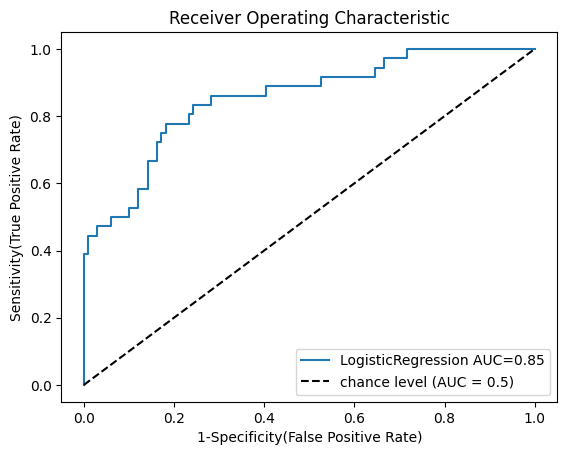

In [134]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
ys_pred_proba = {}
clfs_thresholds = {}
for clf, name in zip(clfs, clfs_names):
    y_pred_proba = clf.predict_proba(X_val)
    y_pred_proba = y_pred_proba[:, 1]
    ys_pred_proba[name] = y_pred_proba

    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    clfs_thresholds[name] = thresholds
    plt.plot(fpr,tpr,label=f"{name} AUC={roc_auc:.2f}"+str())

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [135]:
best_thresholds = {}
for clf, name in zip(clfs, clfs_names):
    best_f1 = 0
    best_th = None
    for threshold in clfs_thresholds[name]:
        y_pred = ys_pred_proba[name] > threshold
        f1 = f1_score(y_val, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_th = threshold
    best_thresholds[name] = best_th

In [136]:
results = {'Name': [], 'Accuracy': [], 'F1 score': [], 'Precision': [], 'Recall': [], 'Best Th.': []}

for clf, name in zip(clfs, clfs_names):
    best_th = best_thresholds[name]
    y_pred = ys_pred_proba[name] > best_th
    results['Name'].append(name)
    results['Accuracy'].append(accuracy_score(y_val, y_pred))
    results['F1 score'].append(f1_score(y_val, y_pred))
    results['Precision'].append(precision_score(y_val, y_pred))
    results['Recall'].append(recall_score(y_val, y_pred))
    results['Best Th.'].append(best_th)

results_df = pd.DataFrame(results)
print("Results after threshold adjustment on VALIDATION")
results_df.head(len(clfs_names))

Results after threshold adjustment on VALIDATION


,Name,Accuracy,F1 score,Precision,Recall,Best Th.
0,LogisticRegression,0.807407,0.675,0.613636,0.75,0.549139


In [137]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test)

results = {'Name': [], 'Accuracy': [], 'F1 score': [], 'Precision': [], 'Recall': []}
ys_pred = {}

for clf, name in zip(clfs, clfs_names):
    y_pred = clf.predict(X_test)
    ys_pred[name] = y_pred
    results['Name'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['F1 score'].append(f1_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred))
    results['Recall'].append(recall_score(y_test, y_pred))

results_df = pd.DataFrame(results)
print("Results WITHOUT threshold adjustment on TEST data")
results_df.head(len(clfs_names))

Results WITHOUT threshold adjustment on TEST data


,Name,Accuracy,F1 score,Precision,Recall
0,LogisticRegression,0.740741,0.623656,0.517857,0.783784


In [138]:
results = {'Name': [], 'Accuracy': [], 'F1 score': [], 'Precision': [], 'Recall': [], 'Best Th.': []}
ys_pred_test_proba = {}

for clf, name in zip(clfs, clfs_names):
    best_th = best_thresholds[name]
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    ys_pred_test_proba[name] = y_pred_proba
    y_pred = y_pred_proba > best_th
    results['Name'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['F1 score'].append(f1_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred))
    results['Recall'].append(recall_score(y_test, y_pred))
    results['Best Th.'].append(best_th)

results_df = pd.DataFrame(results)
print("Results after threshold adjustment on TEST data")
results_df.head(len(clfs_names))

Results after threshold adjustment on TEST data


,Name,Accuracy,F1 score,Precision,Recall,Best Th.
0,LogisticRegression,0.762963,0.636364,0.54902,0.756757,0.549139


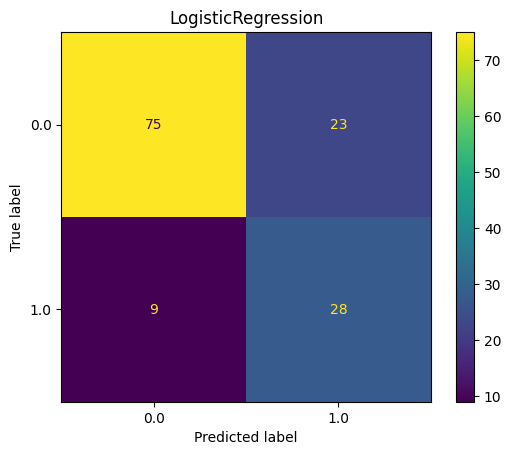

In [139]:
for clf, name in zip(clfs, clfs_names):
    best_th = best_thresholds[name]
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    ys_pred_test_proba[name] = y_pred_proba
    y_pred = y_pred_proba > best_th
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.title(f"{name}")
    plt.show()